## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

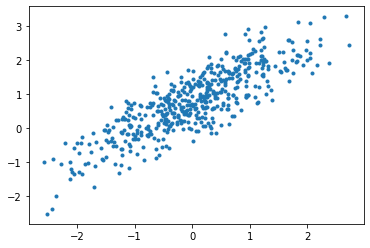

In [3]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
# set up parameters
learning_rate = 1e-3    
n_iter = 10000

# Original learning rate 1e-4 and iteration 100 are too small. I fine tune for getting a better result.

In [5]:
# calculate MSE loss
def MSEloss(y, y_pred):
    
    num = len(y)
    cost = (1/2)*np.sum(np.square(y_pred-y))/num
    
    return cost

In [6]:
# calculate gradient 
def GD (x, y, theta, bias, learning_rate=1e-4, iterations=100):
    
    num = len(y)
    cost_hist = np.zeros(iterations)
    
    for it in range(iterations):
        # Feed forward to get y prediction
        y_pred = theta*x + bias
        
        # Calculating training loss by Mean Square Error of predcition and ground truth data
        cost_hist[it] = MSEloss(y, y_pred) 
        
        # Calculate the gradient and update the weight(theta) and bias
        theta = theta - (1/num)*learning_rate*(x.dot(y_pred - y))
        bias = bias - (1/num)*learning_rate*sum(y_pred - y)
        
    return theta, bias, cost_hist

In [7]:
# main

# random initialze the weight
theta = np.random.rand(1)
bias = np.random.rand(1)

# get weight bias and cost history from gradient descent
theta, bias, cost_hist = GD(x_train, y_train, theta, bias, learning_rate=learning_rate, iterations=n_iter)

print('theta: ', theta)
print('bias: ', bias)
print('final cost: ', cost_hist[n_iter-1])

theta:  [0.81795508]
bias:  [0.7845605]
final cost:  0.13368200194267213


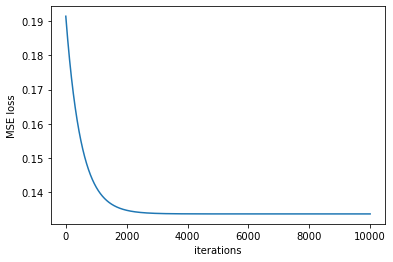

In [8]:
# Problem 1. Plot a learning curve

plt.xlabel('iterations')
plt.ylabel('MSE loss')
plt.plot(cost_hist)


In [9]:
def model(x):
    y_pred = theta*x + bias
    return y_pred

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [10]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [11]:
y_pred = model(x_test)

In [12]:
# Problem 2. Mean Square Error of prediction and grond truth.
cost = MSEloss(y_test, y_pred)
print ('test MSE loss: ', cost)

test MSE loss:  0.03435229041306296


In [13]:
# Problem 3. Weight and Intercepts.
print ('Weight: ', theta, '\nIntercepts: ', bias)

Weight:  [0.81795508] 
Intercepts:  [0.7845605]
